# ANALYSING WHY PATIENTS SHOW UP FOR A MEDICAL APPOINTMENT 

 Author: Oluwatimilehin Folarin
 
 Date:06-08-2022

### PROBLEM STATEMENT

In this project, I will be analysing various factors that influence the decisions of patients whether to show up for their medical appointment or not from a dataset collected in Brazil. The dataset consists of information about a patients from a period between 2015 and 2016.

It is believed that several reasons can attribute to the readiness and willingness of a patients to eventually go for his/her booked medicated appointment. Interestingly, this project gives a surgical visualization and explanantions to the various factors that could contribute to the reason patients in Brazil have tendency of showing up for booked medical appointments.

### FILES

Each row represents information about a patient, and each column contains patient's attributes described.

There are 110,527 rows (patients) and 14 columns (features) in the raw dataset. 

### Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import data

In [2]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv", parse_dates = ['ScheduledDay', 'AppointmentDay']) #The date columns have been converted to datetime with the "parse_dates" function.

### Quick glance at the dataset

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No


## Data Cleaning

### Converting all column names to lower case

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.rename(columns = {'patientid':'patient_id', 'appointmentid': 'appointment_id', 'appointmentday':'appointment_day', 'scheduledday':'scheduled_day', 'no-show':'no_show'}, inplace=True)

In [7]:
df.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


### Number of observations and features in the dataset

In [8]:
df.shape

(110527, 14)

There are 110,527 observations and 14 features in the raw dataset

### checking data types of each columns

In [9]:
df.dtypes

patient_id                     float64
appointment_id                   int64
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hipertension                     int64
diabetes                         int64
alcoholism                       int64
handcap                          int64
sms_received                     int64
no_show                         object
dtype: object

NB: ALL THE COLUMNS ARE IN THEIR CORRECT DATA TYPES

### Converting the "no_show" column to "show" for better communication.

This implies that the 'Yes' will be inverted to 'No' and vice versa

In [10]:
df['no_show'].value_counts()

No     88208
Yes    22319
Name: no_show, dtype: int64

In [11]:
df['no_show'] = df['no_show'].replace(["No","Yes"],["Yes", "No"])

df['show'] = df['no_show']

In [12]:
df.drop(columns = ['no_show'], inplace=True)

In [13]:
df['show'].value_counts()

Yes    88208
No     22319
Name: show, dtype: int64

### Checking for missing values

In [14]:
df.isnull().sum()

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hipertension       0
diabetes           0
alcoholism         0
handcap            0
sms_received       0
show               0
dtype: int64

NO MISSING VALUE

### A brief overview of all column names

In [15]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'show'],
      dtype='object')

## Exploratory Data Analysis

In [16]:
df_decribe = df.copy()
df_describe = df.drop(columns = ['patient_id', 'appointment_id'])
df_describe.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Checking the age distributions of the patients

''

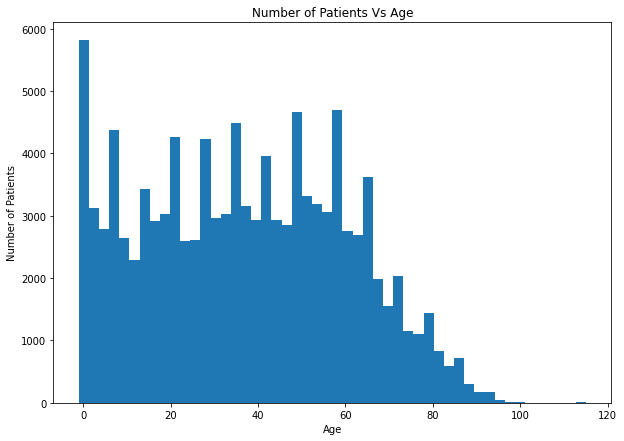

In [17]:
plt.figure(figsize = (10,7))
plt.hist(df['age'], bins =50)
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.title("Number of Patients Vs Age")
;

The distribution of the ages of patients is skewed to the right, with most patients being in the range of 0 to 60 years.

### Checking number of patients that showed up for booked appointment

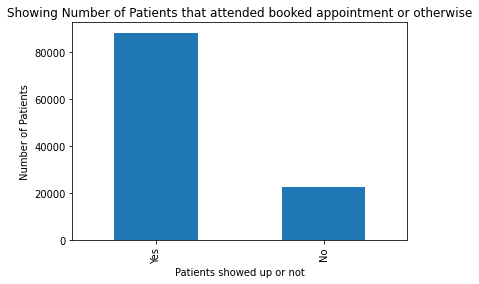

In [18]:
df['show'].value_counts().plot(kind = 'bar')
plt.xlabel("Patients showed up or not")
plt.ylabel("Number of Patients")
plt.title("Showing Number of Patients that attended booked appointment or otherwise");

NB: Most patients showed up for booked appointments

### Calculating the difference in days of the appointment day from the scheduled day

In [19]:
from datetime import datetime


time_diff = (df['appointment_day'] - df['scheduled_day']).dt.days

df.insert(5, "time_diff(days)", time_diff)

In [20]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,time_diff(days),age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,-1,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,-1,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,-1,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,-1,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,-1,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


There ought not to be negative in the time difference. Python rounded it up to the nearest integer which shouldn't be.
<l> Hence, I will be adding +1 to the time difference in days to make it accurate.

In [21]:
df["time_diff(days)"] = df["time_diff(days)"]+1

In [22]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,time_diff(days),age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [23]:
df["time_diff(days)"].value_counts()

0      38563
2       6725
4       5290
1       5213
7       4906
       ...  
82         1
127        1
126        1
151        1
123        1
Name: time_diff(days), Length: 131, dtype: int64

### Checking for the range of period of the appointment days of the patients

In [24]:
app_day = df['appointment_day'].value_counts()
app_day

2016-06-06 00:00:00+00:00    4692
2016-05-16 00:00:00+00:00    4613
2016-05-09 00:00:00+00:00    4520
2016-05-30 00:00:00+00:00    4514
2016-06-08 00:00:00+00:00    4479
2016-05-11 00:00:00+00:00    4474
2016-06-01 00:00:00+00:00    4464
2016-06-07 00:00:00+00:00    4416
2016-05-12 00:00:00+00:00    4394
2016-05-02 00:00:00+00:00    4376
2016-05-18 00:00:00+00:00    4373
2016-05-17 00:00:00+00:00    4372
2016-06-02 00:00:00+00:00    4310
2016-05-10 00:00:00+00:00    4308
2016-05-31 00:00:00+00:00    4279
2016-05-05 00:00:00+00:00    4273
2016-05-19 00:00:00+00:00    4270
2016-05-03 00:00:00+00:00    4256
2016-05-04 00:00:00+00:00    4168
2016-06-03 00:00:00+00:00    4090
2016-05-24 00:00:00+00:00    4009
2016-05-13 00:00:00+00:00    3987
2016-05-25 00:00:00+00:00    3909
2016-05-06 00:00:00+00:00    3879
2016-05-20 00:00:00+00:00    3828
2016-04-29 00:00:00+00:00    3235
2016-05-14 00:00:00+00:00      39
Name: appointment_day, dtype: int64

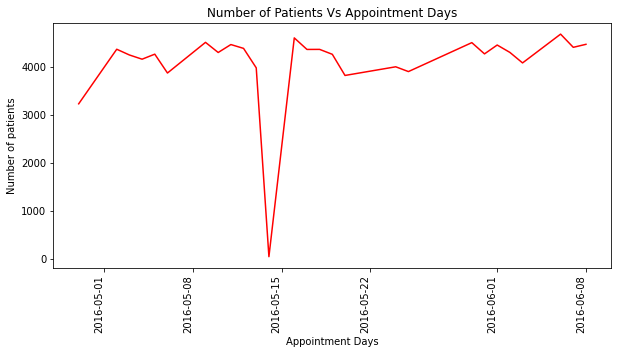

In [25]:
plt.figure(figsize = (10,5))
app_day.plot(color = 'red')
plt.xlabel("Appointment Days")
plt.ylabel("Number of patients")
plt.xticks(rotation = 90)
plt.title("Number of Patients Vs Appointment Days");

There is a relatively steady number of booked appointments per day. Although there was a sudden drop on "2016-05-14."

### Extracting the day name, month name , and year of the scheduled date and appointment date

This will be used for some analysis

In [26]:
df.insert(6, "scheduled_day_", df['scheduled_day'].dt.day_name())

df.insert(7, "scheduled_month", df['scheduled_day'].dt.month_name())

df.insert(8, "scheduled_year", df['scheduled_day'].dt.year)

df.insert(9, "appointment_day_", df['appointment_day'].dt.day_name())

df.insert(10, "appointment_month", df['appointment_day'].dt.month_name())

df.insert(11, "appointment_year", df['appointment_day'].dt.year)

In [27]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,time_diff(days),scheduled_day_,scheduled_month,scheduled_year,appointment_day_,...,appointment_year,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,Friday,April,2016,Friday,...,2016,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,Friday,April,2016,Friday,...,2016,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,Friday,April,2016,Friday,...,2016,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,Friday,April,2016,Friday,...,2016,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,Friday,April,2016,Friday,...,2016,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


# QUESTIONS AND DEDUCTIONS

## Do male patient have possibility to show up more than female?

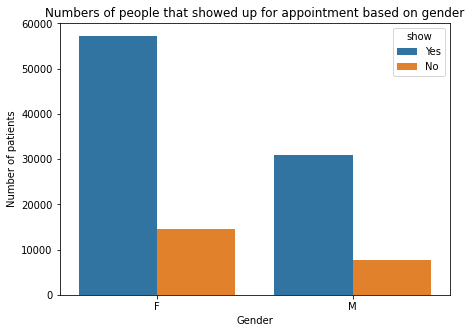

In [28]:
plt.figure(figsize = (7,5))
sns.countplot(x=df['gender'], hue=df['show'], alpha=1.0)
plt.xlabel("Gender")
plt.ylabel('Number of patients')
plt.title("Numbers of people that showed up for appointment based on gender");

**Brief deduction**: From the above chart, it is seen that Females are more represented amongst the patients. Hence, females are have greater number of patients that show up for appointments. 

In order to determine the likelihood of a particular gender to show up for appoitment, we need to investigate the percentage of each gender that showed up in relation to the number of person's of the gender that registered.

#### Determining the percentage of male and females patients that showed up for appointment

In [29]:
male_df = df.query('gender == "M" ')
female_df = df.query('gender == "F" ')

In [30]:
male_show_up = len(male_df.query('show == "Yes"')) / len(male_df)
male_show_up

0.8003205211052808

In [31]:
female_show_up = len(female_df.query('show == "Yes"')) / len(female_df)
female_show_up

0.7968541202672605

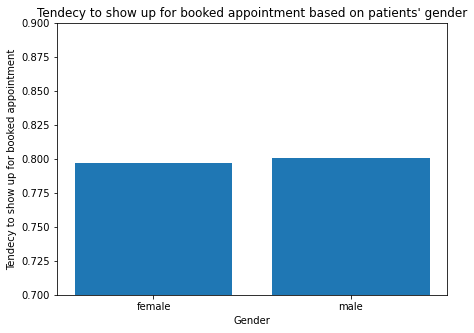

In [32]:
plt.figure(figsize = (7,5))
plt.ylim(.7, .9)
plt.bar(['female', 'male'], [female_show_up, male_show_up])
plt.xlabel("Gender")
plt.ylabel("Tendecy to show up for booked appointment")
plt.title("Tendecy to show up for booked appointment based on patients' gender");

**CONCLUSION**: We can deduce that **male patients** have more likelihood of showing up for appointments with a record of **80.03%** chances. Although female patients have a closer likelihood as well too, falling short a bit with a **79.685%** chances of showing up for appointment
    

## What are the location of hospitals that patients showed up for appointments the most?

In [33]:
yes_df = df.query('show == "Yes" ')

In [34]:
loc_count = pd.DataFrame(df['neighbourhood'].value_counts())

<Figure size 720x360 with 0 Axes>

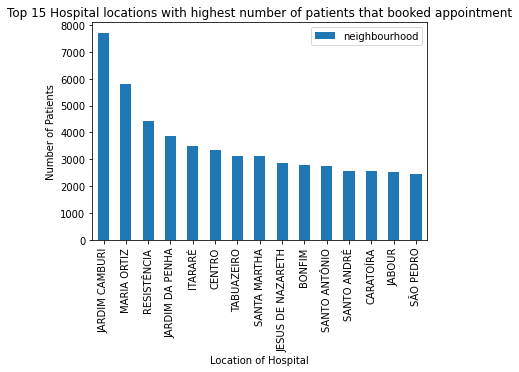

In [35]:
plt.figure(figsize = (10,5))
loc_count[:15].plot(kind = 'bar', title = "Top 15 Hospital locations with highest number of patients that booked appointment")
plt.xlabel("Location of Hospital")
plt.ylabel("Number of Patients");

In [36]:
loc_yes_count = pd.DataFrame(yes_df['neighbourhood'].value_counts())

<Figure size 720x360 with 0 Axes>

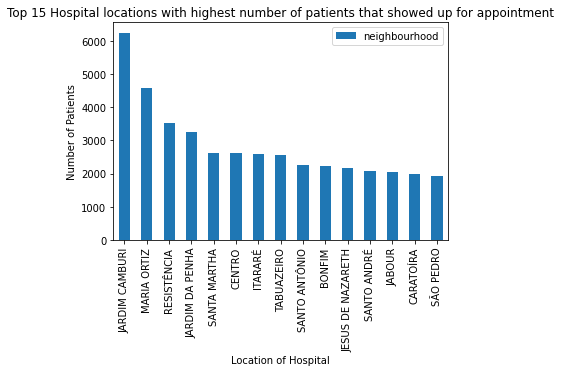

In [37]:
plt.figure(figsize = (10,5))
loc_yes_count[:15].plot(kind = 'bar', title = "Top 15 Hospital locations with highest number of patients that showed up for appointment")
plt.xlabel("Location of Hospital")
plt.ylabel("Number of Patients");

In [38]:
percent_loc_count = loc_yes_count['neighbourhood']/loc_count['neighbourhood']

In [39]:
percent_loc_count.sort_values(ascending = False).dropna()

PARQUE INDUSTRIAL    1.000000
ILHA DO BOI          0.914286
AEROPORTO            0.875000
MÁRIO CYPRESTE       0.854447
SOLON BORGES         0.852878
                       ...   
JESUS DE NAZARETH    0.756046
ITARARÉ              0.737336
SANTA CLARA          0.735178
SANTA CECÍLIA        0.725446
SANTOS DUMONT        0.710815
Name: neighbourhood, Length: 80, dtype: float64

''

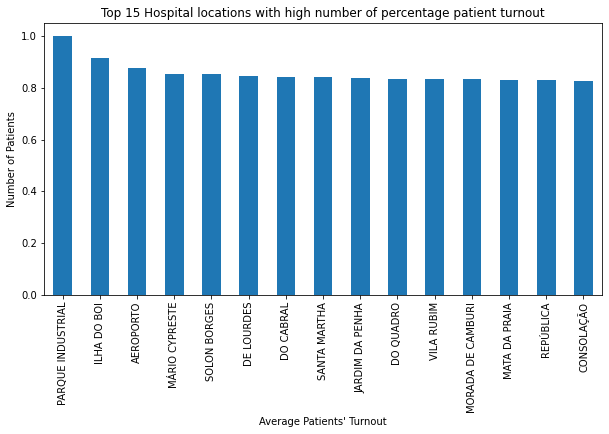

In [40]:

plt.figure(figsize = (10,5))
(
    percent_loc_count.sort_values(ascending = False)
 .dropna()[:15]
 .plot(kind = 'bar', title = 'Top 15 Hospital locations with high number of percentage patient turnout')

)
plt.xlabel("Average Patients' Turnout")
plt.ylabel("Number of Patients")

;

**CONCLUSION:** JARDIM CAMBURI is the location of hospital witht the highest number of patients and highest number of petients that show up for appointment.
This might be because it is relatively cheaper and accessible to the majority of the people, ***but it has lesser probability of patients showing up for booked appointments***

## Do patients with financial assistance show up more for booked appointemnts?

In [41]:
no_scholarship_df = df.query('scholarship == 0 ')
scholarship_df = df.query('scholarship == 1 ')

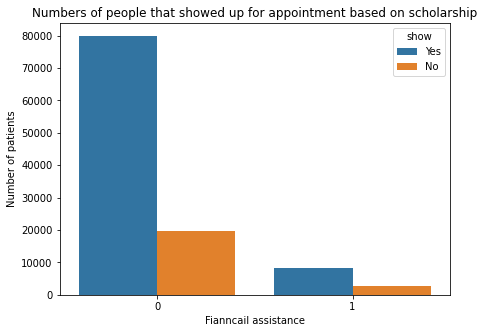

In [42]:
plt.figure(figsize = (7,5))
sns.countplot(x=df['scholarship'], hue=df['show'])
plt.title("Numbers of people that showed up for appointment based on scholarship")
plt.xlabel("Fianncail assistance")
plt.ylabel("Number of patients");

In [43]:
no_scholarship_show_up = len(no_scholarship_df.query('show == "Yes"')) / len(no_scholarship_df)
scholarship_show_up = len(scholarship_df.query('show == "Yes"')) / len(scholarship_df)

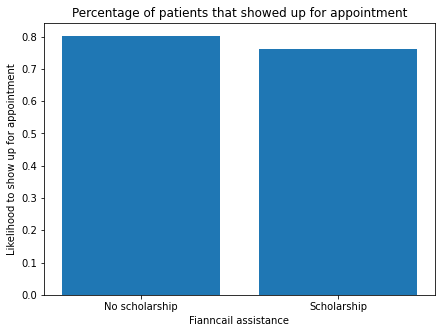

In [44]:
plt.figure(figsize = (7,5))
plt.bar(['No scholarship', 'Scholarship'], [no_scholarship_show_up, scholarship_show_up])
plt.title("Percentage of patients that showed up for appointment")
plt.xlabel("Fianncail assistance")
plt.ylabel("Likelihood to show up for appointment");

**CONCLUSION:** Being part of the Fome Zero network of federal assistance programs does not equate to high possibility of showing up for booked appointment. It is seen that people who do not have financial assistance even tend to show up the most. This can be attributed to the fact that **patients do not joke with what they use their money to pay for.**

## Age distribution of patients that show up for booked appointment

In [45]:
df['age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

There is a patient with age -1 which is not possible. I will be replacing it with the modal age.
    
Also, there are patients with age 0. This implies they are babies less than 1 year old.
    
**From the value counts of the patients' age, patients with age 0 are the most represented.This means that most of the patients are babies**


In [46]:
df['age'] = df['age'].replace(-1, 1) #It could be realised that the -1 was an error. Most likely the person wanted to input 1

In [47]:
age_count = df.groupby(['age','show'], as_index=False).count()

''

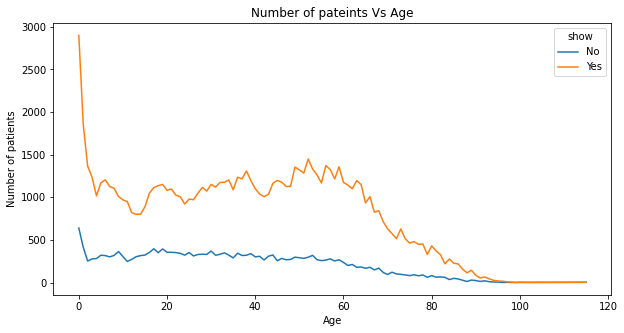

In [48]:
plt.figure(figsize=(10,5))
sns.lineplot(x=age_count['age'], y=age_count['patient_id'], hue=age_count['show'], alpha=1.0)
plt.xlabel("Age")
plt.ylabel("Number of patients")
plt.title("Number of pateints Vs Age")
;

**CONCLUSION:** Aside patients of age 0 and 1, patients aroung ages 49-55 tends to show up for booked appointments more.

## Does time difference between scheduled day and appointment day affect the tendency of a patient showing up for booked appointment?

In [49]:
df['appointment_year'].value_counts()

2016    110527
Name: appointment_year, dtype: int64

In [50]:
df['scheduled_year'].value_counts()

2016    110465
2015        62
Name: scheduled_year, dtype: int64

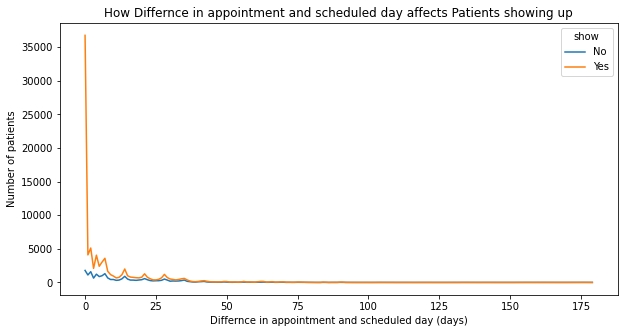

In [51]:
diff_count = df.groupby(['time_diff(days)','show'], as_index=False).count()
diff_count.drop(diff_count[diff_count['time_diff(days)'] < 0].index, inplace=True) # Any row with difference between scheduled day and appointment day less than 0 is an error
plt.figure(figsize=(10,5))
sns.lineplot(x=diff_count['time_diff(days)'], y=diff_count['patient_id'], hue=diff_count['show'])
plt.xlabel("Differnce in appointment and scheduled day (days)")
plt.ylabel("Number of patients")
plt.title("How Differnce in appointment and scheduled day affects Patients showing up");

**CONCLUSION:** The difference between scheduled day and appointment day do not necessarily affect the tendency of a patient showing up.
<li> However, we have high number of patients whose appointment day is within 25 days (a month) of their scheduled day.

## Do the appointment day of the week affect likelihood of patients showing up for a booked appointment?

In [52]:
appointment_day_percent = yes_df['appointment_day_'].value_counts()/df['appointment_day_'].value_counts()
appointment_day_percent

Wednesday    0.803108
Tuesday      0.799064
Monday       0.793529
Friday       0.787739
Thursday     0.806459
Saturday     0.769231
Name: appointment_day_, dtype: float64

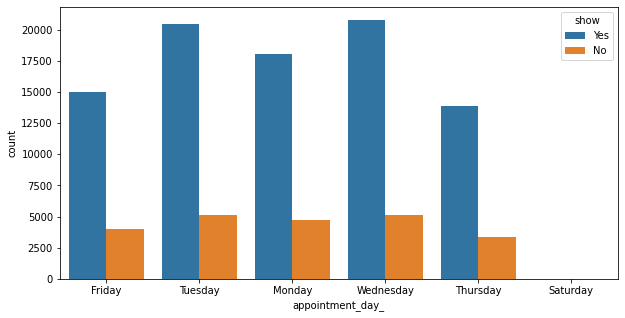

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['appointment_day_'], hue=df['show'])
plt.title("");

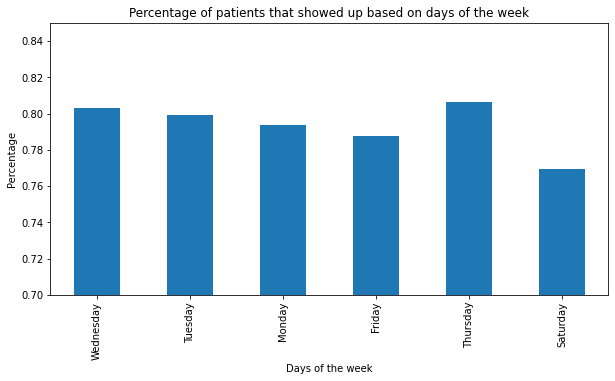

In [54]:
plt.figure(figsize = (10,5))
plt.ylim(.7, .85)
appointment_day_percent.plot(kind='bar')
plt.xlabel("Days of the week")
plt.ylabel("Percentage")
plt.title("Percentage of patients that showed up based on days of the week");

**CONCLUSION:** The day of the week the appointment day falls do not influence the likelihood of patients showing up for a booked appointment. It can be seen that there is a range of 76-81% tendency of patients showing up for booked appointment in any of the day of the week. But **Thursday tops the list with 80.65% chances of patients eventually going for their booked appointment.**

## CORRELATION OF 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received', with tendency of patients showing up or not.

In [55]:
new_df = df.copy()

In [56]:
new_df['show'] = new_df['show'].map({
    'Yes':1,
    'No':0
})

In [57]:
numeric_df = new_df[['scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received', 'show']]

In [58]:
nc = numeric_df.corr()['show'][:-1]
nc

scholarship    -0.029135
hipertension    0.035701
diabetes        0.015180
alcoholism      0.000196
handcap         0.006076
sms_received   -0.126431
Name: show, dtype: float64

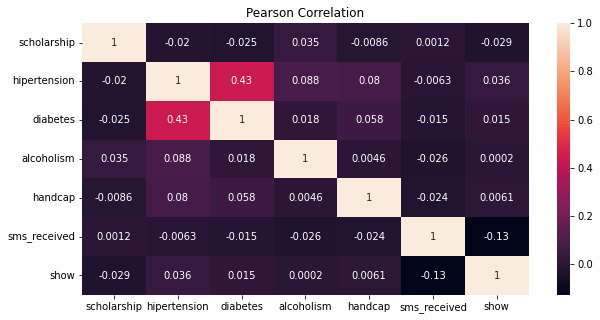

In [59]:
plt.figure(figsize = (10,5))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Pearson Correlation");

**CONCLUSION:** Based on Pearson correlation, it can be seen that only 'sms_received' column has a fairly correlated linear regression with the tendency of patients showing up for a booked appointment or not.
<li> Nevertheless, this doesn't imply that other features are not determinant of the tendency of showing up for booked appointments

## Which of the following conditions triggers patients to show up for a booked appoitnment: 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received'?

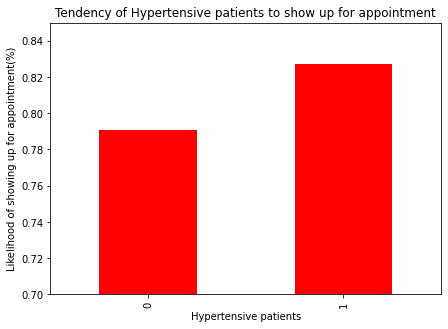

In [60]:
hyp_percent = yes_df['hipertension'].value_counts()/df['hipertension'].value_counts()

plt.figure(figsize = (7,5))
plt.ylim(.7, .85)
hyp_percent.plot(kind='bar', color='red', title = "Tendency of Hypertensive patients to show up for appointment")
plt.xlabel("Hypertensive patients")
plt.ylabel("Likelihood of showing up for appointment(%)");

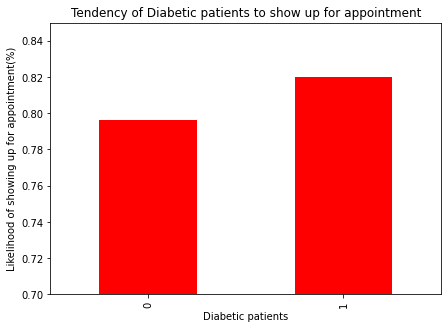

In [61]:
diab_percent = yes_df['diabetes'].value_counts()/df['diabetes'].value_counts()

plt.figure(figsize = (7,5))
plt.ylim(.7, .85)
diab_percent.plot(kind='bar', color='red', title = "Tendency of Diabetic patients to show up for appointment")
plt.xlabel("Diabetic patients")
plt.ylabel("Likelihood of showing up for appointment(%)");

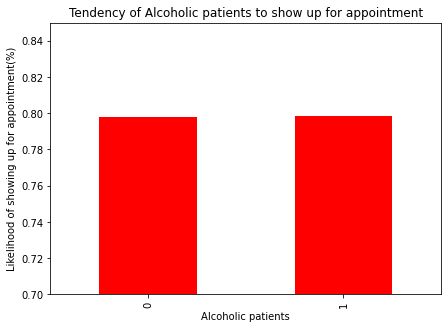

In [62]:
alc_percent = yes_df['alcoholism'].value_counts()/df['alcoholism'].value_counts()

plt.figure(figsize = (7,5))
plt.ylim(.7, .85)
alc_percent.plot(kind='bar', color='red', title = "Tendency of Alcoholic patients to show up for appointment")
plt.xlabel("Alcoholic patients")
plt.ylabel("Likelihood of showing up for appointment(%)");

''

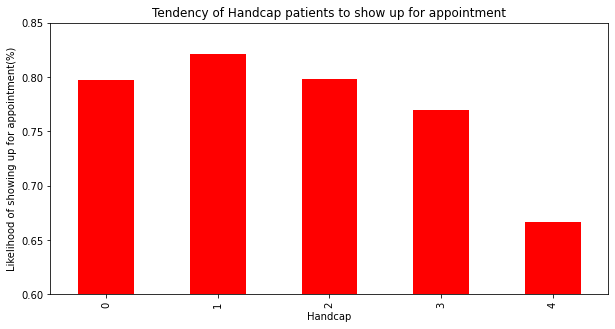

In [63]:
handcap_percent = yes_df['handcap'].value_counts()/df['handcap'].value_counts()

plt.figure(figsize = (10,5))
plt.ylim(.6, .85)
handcap_percent.plot(kind='bar', color='red', title = "Tendency of Handcap patients to show up for appointment")
plt.xlabel("Handcap")
plt.ylabel("Likelihood of showing up for appointment(%)")
;

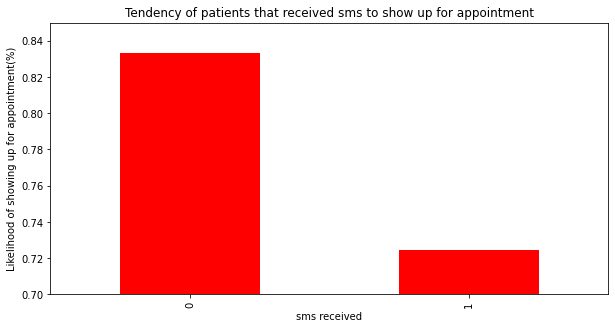

In [64]:
sms_percent = yes_df['sms_received'].value_counts()/df['sms_received'].value_counts()

plt.figure(figsize = (10,5))
plt.ylim(.7, .85)
sms_percent.plot(kind='bar', color='red', title = "Tendency of patients that received sms to show up for appointment")
plt.xlabel("sms received")
plt.ylabel("Likelihood of showing up for appointment(%)");

Even patients that do not receive sms showed up for booked appointment more than people that got sms.

In [65]:
print(f'Hypertension: \n{hyp_percent}\n')
print(f'Diabetes: \n{diab_percent}\n')
print(f'Alcoholism: \n{alc_percent}\n')
print(f'Handcap: \n{handcap_percent}\n')
print(f'Sms_received: \n{sms_percent}')

Hypertension: 
0    0.790963
1    0.826980
Name: hipertension, dtype: float64

Diabetes: 
0    0.796372
1    0.819967
Name: diabetes, dtype: float64

Alcoholism: 
0    0.798054
1    0.798512
Name: alcoholism, dtype: float64

Handcap: 
0    0.797647
1    0.820764
2    0.797814
3    0.769231
4    0.666667
Name: handcap, dtype: float64

Sms_received: 
0    0.832967
1    0.724255
Name: sms_received, dtype: float64


**CONCLUSION**: Out of the following conditions: ***'hypertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',*** people that **did not receive** sms have the largest percentage turn out. This could be a result of curiosity and fear to get medical attention.
**People who have Hypertension** have a higher possibility of showing up for booked appointment as well.